# **Recommendation System**
Recommendation Systems are the systems that predict and filter the future preferences of user based based on their past experience. They are widely to recommend 
* similar products (Amazon, Flipkart)
* relevant media, e.g. photos, videos and stories (Instagram)
* relevant series and movies (Netflix, Amazon Prime Video, Hotstar)
* relevant songs and podcasts (Spotify)
* relevant videos (YouTube)
* similar users, posts (LinkedIn, Twitter, Instagram)
* relevant dishes and restaurants (Uber Eats, Zomato, Swiggy)

There are mainly 2 types of Recommendation System
1. Content Based RS
1. Collaborative Filtering
![](https://user-images.githubusercontent.com/43712046/69491476-766eb100-0e5b-11ea-8fa7-6bfc781045a8.png)

# **Content Based Recommendation Systems**
There are cases when the user is new on a platform and we end up having no prior information on the user. In such scenerios, we recommend similar items based on comments, feedbacks, reviews, description of the items with which the user interacts. 

Models/ Algorithms like TF-IDF score, word2vec are used to capture the similarty in Content Based RS.

In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [73]:
import nltk

In [74]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinayak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [75]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinayak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## **Load the Dataset**

In [76]:
df_netflix = pd.read_csv("netflix_titles.csv")
print (df_netflix.shape)
df_netflix.head()

(6234, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## **Analyses of TV Shows v/s Movies**

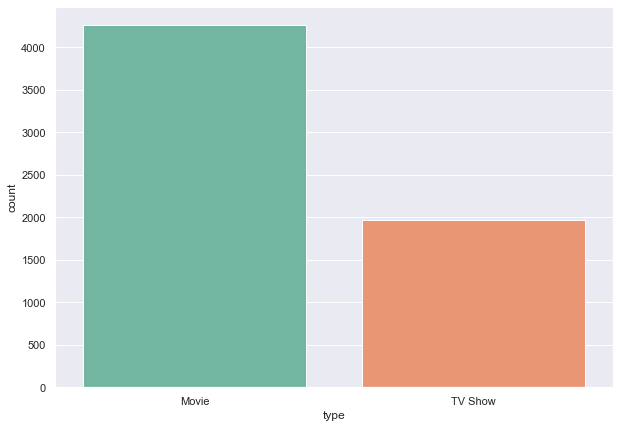

In [77]:
plt.figure(figsize=(10,7))
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df_netflix, palette="Set2")

## **County wise analysis**

In [78]:
import itertools
list_country = [x.split(', ') for x in df_netflix.dropna(subset=['country'])['country'].tolist()]
list_country = list(itertools.chain(*list_country))

from collections import Counter
df_netflix_country_count = pd.DataFrame(Counter(list_country).most_common()[:10], columns=['Country', 'Count'])

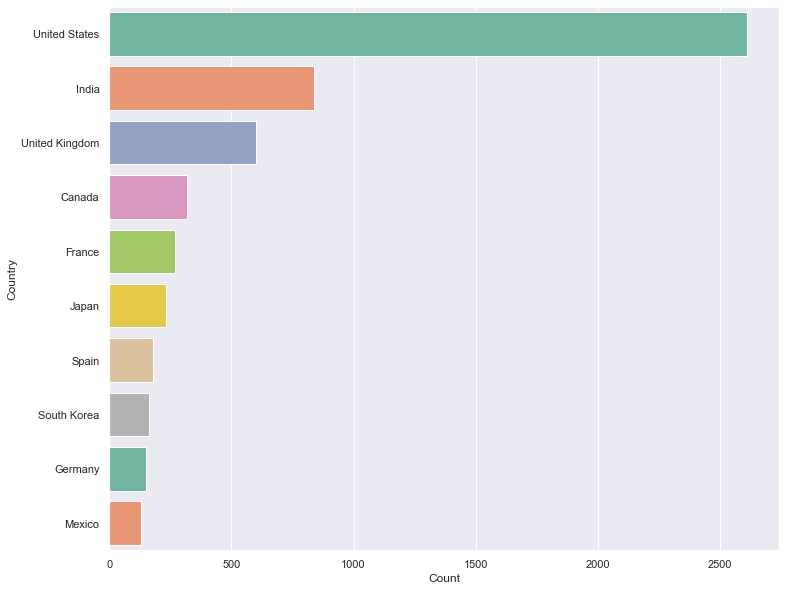

In [79]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.barplot(y="Country", x='Count', data=df_netflix_country_count, palette="Set2", orient='h')

## **Year wise analysis**

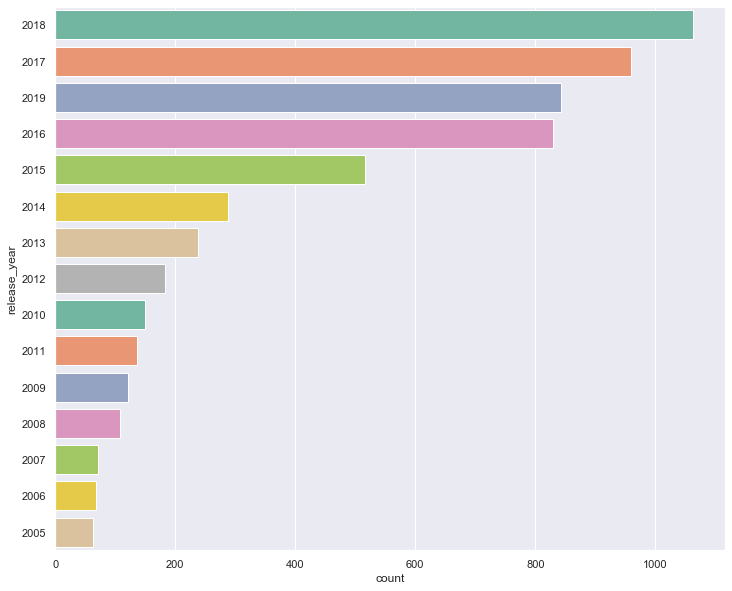

In [80]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='release_year', data=df_netflix, palette="Set2", order=df_netflix['release_year'].value_counts().index[0:15])

## **Preprocessing of the data for RS**

### **Retaining only Relevant Columns**

In [81]:
df_netflix.drop(columns=['director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'type'], inplace=True)
df_netflix.head()

,show_id,title,listed_in,description
0,81145628,Norm of the North: King Sized Adventure,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Jandino: Whatever it Takes,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,Transformers Prime,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,Transformers: Robots in Disguise,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,#realityhigh,Comedies,When nerdy high schooler Dani finally attracts...


In [82]:
from nltk.tokenize import word_tokenize

### **Removing Punctuations and Stopwords**

In [83]:
from nltk.tokenize import word_tokenize

df_netflix['title'] = df_netflix['title'].str.lower()
df_netflix['listed_in'] = df_netflix['listed_in'].str.lower()
df_netflix['description'] = df_netflix['description'].str.lower()

df_netflix['title'] = df_netflix['title'].apply(word_tokenize)
df_netflix['listed_in'] = df_netflix['listed_in'].apply(word_tokenize)
df_netflix['description'] = df_netflix['description'].apply(word_tokenize)

In [84]:
from nltk.corpus import stopwords
from string import punctuation

list_stopwords = set(stopwords.words('english') + list(punctuation))
df_netflix['title'] = df_netflix['title'].apply(lambda x: [word for word in x if word not in list_stopwords])
df_netflix['listed_in'] = df_netflix['listed_in'].apply(lambda x: [word for word in x if word not in list_stopwords])
df_netflix['description'] = df_netflix['description'].apply(lambda x: [word for word in x if word not in list_stopwords])

In [85]:
import string

df_netflix['description'] = df_netflix['description'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
df_netflix['description'] = df_netflix['description'].apply(lambda x : [word for word in x if len(word) > 0])

In [86]:
df_netflix['title'] = df_netflix['title'].apply(lambda x : list(set(x)))
df_netflix['listed_in'] = df_netflix['listed_in'].apply(lambda x : list(set(x)))
df_netflix['description'] = df_netflix['description'].apply(lambda x : list(set(x)))

In [87]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


## **WordCloud for Genres**

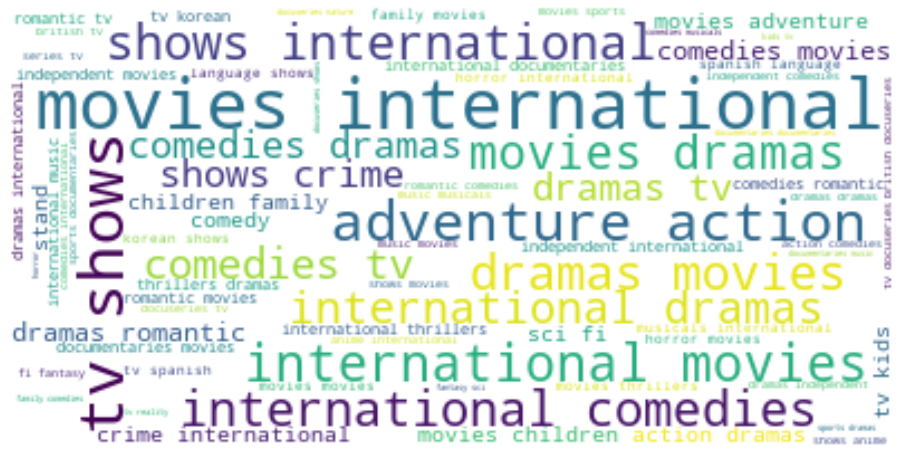

In [88]:
from wordcloud import WordCloud

list_genre = df_netflix['listed_in'].tolist()
list_genre = list(itertools.chain(*list_genre))
genre = ' '.join(list_genre)

plt.figure(figsize=(16,12))
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(genre)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

## **WordCloud for Description**

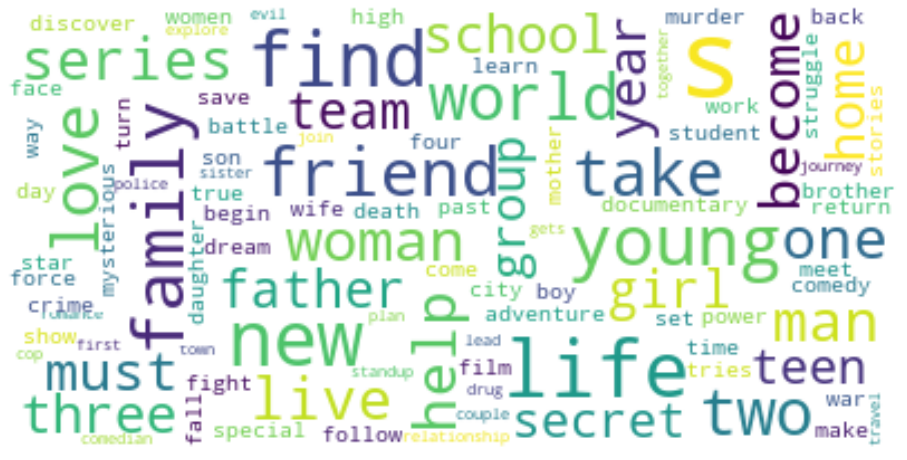

In [89]:
list_description = df_netflix['description'].tolist()
list_description = list(itertools.chain(*list_description))
description = ' '.join(list_description)

plt.figure(figsize=(16,12))
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(description)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

## **Download pretrained [word2vec](https://code.google.com/archive/p/word2vec/) model from Google**

In [90]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gunzip GoogleNews-vectors-negative300.bin.gz

'wget' is not recognized as an internal or external command,
operable program or batch file.
'gunzip' is not recognized as an internal or external command,
operable program or batch file.


In [91]:
import gensim

wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

ModuleNotFoundError: No module named 'gensim'

### Find Similarities Among Shows using ***Title, Genres, Description***

In [70]:
matrix_netflix_vocab = []
for list_ in df_netflix.to_numpy():
    list_[2] = [word for word in list_[2] if word in wv.vocab]
    list_[3] = [word for word in list_[3] if word in wv.vocab]
    list_[4] = [word for word in list_[4] if word in wv.vocab]
    matrix_netflix_vocab.append(list_)
df_netflix_vocab = pd.DataFrame(matrix_netflix_vocab, columns=df_netflix.columns)

NameError: name 'wv' is not defined

In [71]:
from tqdm import tqdm

def recommendation(title):
    matrix_netflix_title_vocab = []
    for list_ in df_netflix[df_netflix['title'] == title].to_numpy():
        list_[2] = [word for word in list_[2] if word in wv.vocab]
        list_[3] = [word for word in list_[3] if word in wv.vocab]
        list_[4] = [word for word in list_[4] if word in wv.vocab]
        matrix_netflix_title_vocab.append(list_)

    matrix_similarity = []
    pbar = tqdm(matrix_netflix_vocab)
    for list1 in pbar:
        for list2 in matrix_netflix_title_vocab:
            score_catg = wv.n_similarity(list1[2], list2[2])
            score_desc = wv.n_similarity(list1[3], list2[3])
            try:
                score_title = wv.n_similarity(list1[4], list2[4])/2
            except:
                score_title = 0
            if ((list1[1] != list2[1]) & (score_catg > 0.85)):
                matrix_similarity.append([list1[1], list2[1], score_title, score_catg, score_desc])
        pbar.update()
    pbar.close()
    df_netflix_similarity = pd.DataFrame(matrix_similarity, columns = ['recommendation','title','score_title', 'score_category', 'score_description'])
    df_netflix_similarity['final_score'] = df_netflix_similarity['score_title'] + df_netflix_similarity['score_category'] + df_netflix_similarity['score_description']
    return (df_netflix_similarity.sort_values(by=['final_score', 'score_category', 'score_description', 'score_title'], ascending=False).head(10))

## **RS in action on different shows**

In [69]:
recommendation('Avengers: Infinity War')

NameError: name 'recommendation' is not defined

In [ ]:
recommendation('Black Panther')

In [ ]:
recommendation('Friends')

In [ ]:
recommendation("Article 15")

In [10]:
recommendation('Transformers: Robots in Disguise')

NameError: name 'recommendation' is not defined